# part 1

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = 2
batch_size = 64
learning_rate = 0.001
num_epochs = 10

In [3]:
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor()])

train_dataset = CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = CIFAR10(root='./data', train=False, transform=transform, download=True)

100%|██████████| 170498071/170498071 [00:01<00:00, 102933518.94it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
def is_airplane_or_automobile(label):
    return label == 0 or label == 1

In [5]:
def filter_dataset(dataset, filter_func):
    filtered_indices = [i for i in range(len(dataset)) if filter_func(dataset.targets[i])]
    return torch.utils.data.Subset(dataset, filtered_indices)

In [6]:
airplane_or_automobile_train_dataset = filter_dataset(train_dataset, is_airplane_or_automobile)
airplane_or_automobile_test_dataset = filter_dataset(test_dataset, is_airplane_or_automobile)
print(len(airplane_or_automobile_train_dataset), len(airplane_or_automobile_test_dataset))

10000 2000


In [7]:
airplane_or_automobile_train_loader = DataLoader(dataset=airplane_or_automobile_train_dataset, batch_size=batch_size, shuffle=True)
airplane_or_automobile_test_loader = DataLoader(dataset=airplane_or_automobile_test_dataset, batch_size=batch_size, shuffle=False)
print(len(airplane_or_automobile_train_loader), len(airplane_or_automobile_test_loader))

157 32


In [8]:
next(iter(airplane_or_automobile_train_loader))[0].shape

torch.Size([64, 3, 224, 224])

In [9]:
resnet50_model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
resnet50_model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 142MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
for param in resnet50_model.parameters():
    param.requires_grad = False

In [11]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

resnet50_model.fc = torch.nn.Linear(in_features=2048, out_features=2, bias=True).to(device)

In [12]:
resnet50_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
resnet50_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
device

device(type='cuda')

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet50_model.parameters(), lr=learning_rate)
acc_train = []
acc_test = []
loss_all = []

for epoch in range(num_epochs):
    correct, total = 0, 0
    resnet50_model.train()
    for images, labels in airplane_or_automobile_train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet50_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = correct / total
    acc_train.append(accuracy)
    loss_all.append(loss.item())

    resnet50_model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in airplane_or_automobile_test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = resnet50_model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    acc_test.append(accuracy)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Accuracy: {100 * accuracy:.2f}%')

Epoch [1/10], Loss: 0.4235, Test Accuracy: 92.10%
Epoch [2/10], Loss: 0.2643, Test Accuracy: 93.65%
Epoch [3/10], Loss: 0.2053, Test Accuracy: 93.75%
Epoch [4/10], Loss: 0.2980, Test Accuracy: 94.35%
Epoch [5/10], Loss: 0.2247, Test Accuracy: 94.55%
Epoch [6/10], Loss: 0.1866, Test Accuracy: 94.65%
Epoch [7/10], Loss: 0.2058, Test Accuracy: 95.00%
Epoch [8/10], Loss: 0.0971, Test Accuracy: 94.90%
Epoch [9/10], Loss: 0.1542, Test Accuracy: 94.90%
Epoch [10/10], Loss: 0.2855, Test Accuracy: 95.00%


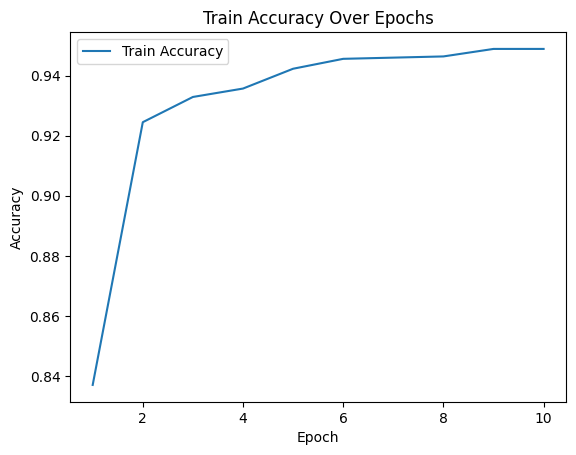

In [44]:
plt.plot(range(1, 11), acc_train[0:10], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy Over Epochs')
plt.legend()
plt.show()

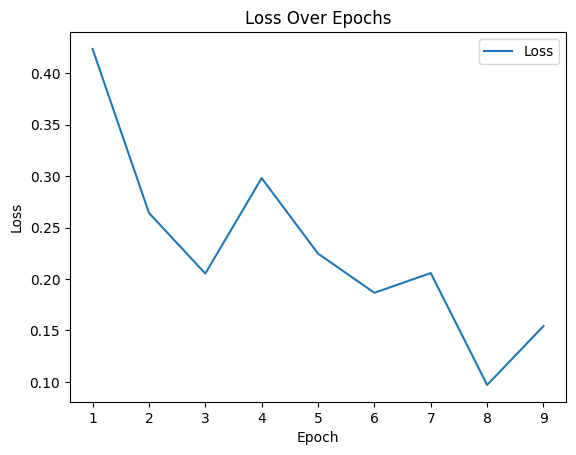

In [45]:
plt.plot(range(1, 10), loss_all[0:9], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

# part 2

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10
from torch.nn.functional import pairwise_distance
import matplotlib.pyplot as plt

In [7]:
resnet50_model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

resnet50_model.fc = torch.nn.Linear(in_features=2048, out_features=2, bias=True).to(device)
resnet50_model.to(device)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 157MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [41]:
class TripletLoss(nn.Module):
    def __init__(self, margin=1.0):
        super(TripletLoss, self).__init__()
        self.margin = margin

    def forward(self, anchor, positive, negative):
        distance_positive = pairwise_distance(anchor, positive)
        distance_negative = pairwise_distance(anchor, negative)
        loss = torch.relu(distance_positive - distance_negative + self.margin)
        return loss.mean()

In [42]:
def train_triplet(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0

    for batch in train_loader:
        anchor, positive, negative, _ = batch
        anchor, positive, negative = anchor.to(device), positive.to(device), negative.to(device)

        optimizer.zero_grad()
        outputs_anchor = model(anchor)
        outputs_positive = model(positive)
        outputs_negative = model(negative)

        loss = criterion(outputs_anchor, outputs_positive, outputs_negative)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(train_loader)

In [43]:
from torchvision.transforms import ToPILImage
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __getitem__(self, index):
        anchor, anchor_label = self.dataset[index]

        anchor = transforms.ToPILImage()(anchor)
        index_new = torch.randint(len(self.dataset), size=(1,)).item()

        positive, positive_label = self.dataset[index_new]
        while positive_label != anchor_label:
            index_new = torch.randint(len(self.dataset), size=(1,)).item()
            positive, positive_label = self.dataset[index_new]

        positive = transforms.ToPILImage()(positive)

        index_new = torch.randint(len(self.dataset), size=(1,)).item()
        negative, negative_label = self.dataset[index_new]
        while negative_label == anchor_label:
            index_new = torch.randint(len(self.dataset), size=(1,)).item()
            negative, negative_label = self.dataset[index_new]

        negative = transforms.ToPILImage()(negative)

        if self.transform:
            anchor = self.transform(anchor)
            positive = self.transform(positive)
            negative = self.transform(negative)

        return anchor, positive, negative, anchor_label

    def __len__(self):
        return len(self.dataset)

In [20]:
def train_cross_entropy(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()

    return (running_loss / len(train_loader)), (correct / total)

In [21]:
def evaluate(model, test_loader, device):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

In [22]:
def set_fc_requires_grad(model, requires_grad):
    for param in model.resnet50_model.fc.parameters():
        param.requires_grad = requires_grad

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = 2
batch_size = 64
learning_rate = 0.001
num_epochs_triplet = 5
num_epochs_cross_entropy = 5
margin = 1.0

In [30]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [31]:
airplane_or_automobile_train_dataset = filter_dataset(train_dataset, is_airplane_or_automobile)
airplane_or_automobile_test_dataset = filter_dataset(test_dataset, is_airplane_or_automobile)

airplane_or_automobile_train_loader = DataLoader(dataset=CustomDataset(airplane_or_automobile_train_dataset, transform),
                                                  batch_size=batch_size, shuffle=True)
airplane_or_automobile_test_loader = DataLoader(dataset=CustomDataset(airplane_or_automobile_test_dataset, transform),
                                                 batch_size=batch_size, shuffle=False)
print(len(airplane_or_automobile_train_loader), len(airplane_or_automobile_test_loader))

157 32


In [32]:
next(iter(airplane_or_automobile_train_loader))

[tensor([[[[0.7647, 0.7647, 0.7647,  ..., 0.8667, 0.8667, 0.8667],
           [0.7647, 0.7647, 0.7647,  ..., 0.8667, 0.8667, 0.8667],
           [0.7647, 0.7647, 0.7647,  ..., 0.8667, 0.8667, 0.8667],
           ...,
           [0.5804, 0.5804, 0.5804,  ..., 0.4863, 0.4863, 0.4863],
           [0.5804, 0.5804, 0.5804,  ..., 0.4863, 0.4863, 0.4863],
           [0.5804, 0.5804, 0.5804,  ..., 0.4863, 0.4863, 0.4863]],
 
          [[0.7882, 0.7882, 0.7882,  ..., 0.8863, 0.8863, 0.8863],
           [0.7882, 0.7882, 0.7882,  ..., 0.8863, 0.8863, 0.8863],
           [0.7882, 0.7882, 0.7882,  ..., 0.8863, 0.8863, 0.8863],
           ...,
           [0.5608, 0.5608, 0.5608,  ..., 0.4510, 0.4510, 0.4510],
           [0.5608, 0.5608, 0.5608,  ..., 0.4510, 0.4510, 0.4510],
           [0.5608, 0.5608, 0.5608,  ..., 0.4510, 0.4510, 0.4510]],
 
          [[0.8784, 0.8784, 0.8784,  ..., 0.9569, 0.9569, 0.9569],
           [0.8784, 0.8784, 0.8784,  ..., 0.9569, 0.9569, 0.9569],
           [0.8784, 0.87

In [33]:
img_custom, img_custom2, img_custom3, label_custom = next(iter(airplane_or_automobile_train_loader))
print(img_custom.shape)
print(img_custom2.shape)
print(img_custom3.shape)
print(label_custom.shape)

torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64, 3, 224, 224])
torch.Size([64])


In [58]:
for param in resnet50_model.fc.parameters():
    param.requires_grad = True
triplet_criterion = TripletLoss(margin=margin)
optimizer_triplet = optim.Adam(resnet50_model.parameters(), lr=learning_rate)

loss_all = []
for epoch in range(num_epochs_triplet):
    loss_triplet = train_triplet(resnet50_model, airplane_or_automobile_train_loader, triplet_criterion, optimizer_triplet, device)
    print(f'Epoch [{epoch+1}/{num_epochs_triplet}], Triplet Loss: {loss_triplet:.4f}')
    loss_all.append(loss_triplet)


Epoch [1/5], Triplet Loss: 0.2107
Epoch [2/5], Triplet Loss: 0.1889
Epoch [3/5], Triplet Loss: 0.1667
Epoch [4/5], Triplet Loss: 0.1644
Epoch [5/5], Triplet Loss: 0.1491


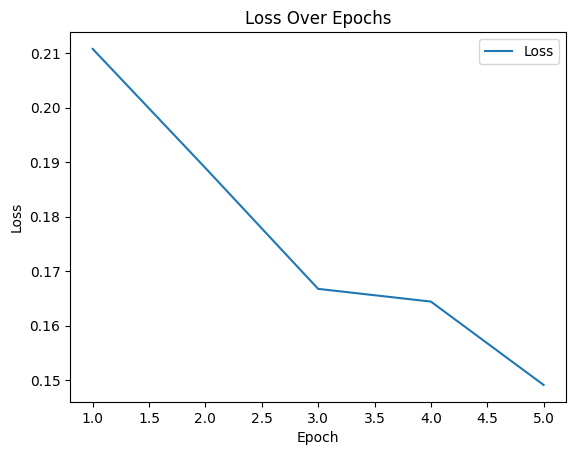

In [59]:
plt.plot(range(1, 6), loss_all[0:5], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [60]:
for param in resnet50_model.parameters():
    param.requires_grad = False

In [61]:
for param in resnet50_model.fc.parameters():
    param.requires_grad = True

In [62]:
airplane_or_automobile_train_dataset = filter_dataset(train_dataset, is_airplane_or_automobile)
airplane_or_automobile_test_dataset = filter_dataset(test_dataset, is_airplane_or_automobile)
print(len(airplane_or_automobile_train_dataset), len(airplane_or_automobile_test_dataset))

airplane_or_automobile_train_loader = DataLoader(dataset=airplane_or_automobile_train_dataset, batch_size=batch_size, shuffle=True)
airplane_or_automobile_test_loader = DataLoader(dataset=airplane_or_automobile_test_dataset, batch_size=batch_size, shuffle=False)
print(len(airplane_or_automobile_train_loader), len(airplane_or_automobile_test_loader))

10000 2000
157 32


In [67]:
criterion_cross_entropy = nn.CrossEntropyLoss()
optimizer_cross_entropy = optim.Adam(resnet50_model.parameters(), lr=learning_rate)
acc_all = []
loss_all = []
for epoch in range(num_epochs_cross_entropy):
    loss_cross_entropy, acc = train_cross_entropy(resnet50_model, airplane_or_automobile_train_loader, criterion_cross_entropy, optimizer_cross_entropy, device)
    print(f'Epoch [{epoch+1}/{num_epochs_cross_entropy}], Cross Entropy Loss: {loss_cross_entropy:.4f}')
    loss_all.append(loss_cross_entropy)
    acc_all.append(acc)

Epoch [1/5], Cross Entropy Loss: 0.0905
Epoch [2/5], Cross Entropy Loss: 0.0815
Epoch [3/5], Cross Entropy Loss: 0.0802
Epoch [4/5], Cross Entropy Loss: 0.0914
Epoch [5/5], Cross Entropy Loss: 0.0903


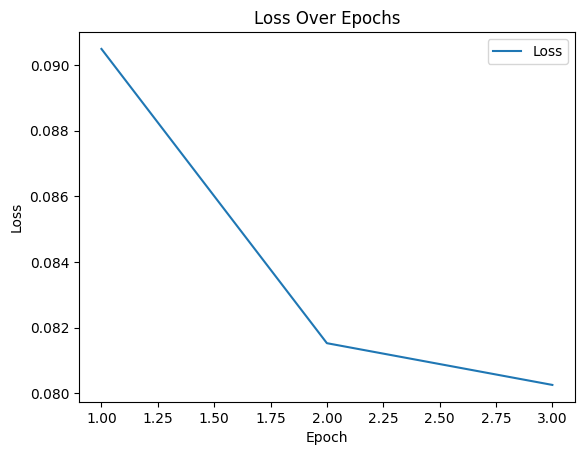

In [71]:
plt.plot(range(1, 4), loss_all[0:3], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

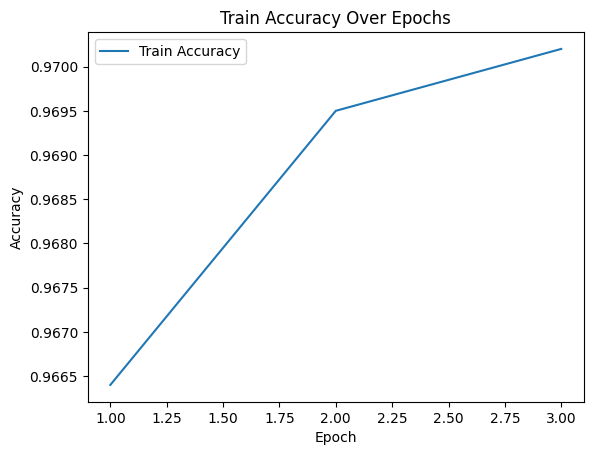

In [72]:
plt.plot(range(1, 4), acc_all[0:3], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy Over Epochs')
plt.legend()
plt.show()

In [70]:
resnet50_model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in airplane_or_automobile_test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet50_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Final Test Accuracy: {100 * accuracy:.2f}%')

Final Test Accuracy: 96.35%


# part 3

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision import transforms
from torch.autograd import Variable

In [48]:
class TripletCrossEntropyLoss(nn.Module):
    def __init__(self, alpha=1):
        super(TripletCrossEntropyLoss, self).__init__()
        self.alpha = alpha
        self.cross_entropy_loss = nn.CrossEntropyLoss()

    def forward(self, output, anchor, positive, negative, labels):
        triplet_loss = TripletLoss()(anchor, positive, negative)
        cross_entropy_loss = self.cross_entropy_loss(output, labels)
        total_loss = triplet_loss + self.alpha * cross_entropy_loss
        return total_loss

In [49]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = 2
batch_size = 64
learning_rate = 0.001
num_epochs = 5

In [50]:
resnet50_model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
for param in resnet50_model.parameters():
    param.requires_grad = False
torch.manual_seed(42)
torch.cuda.manual_seed(42)

resnet50_model.fc = torch.nn.Linear(in_features=2048, out_features=2, bias=True).to(device)
resnet50_model.to(device)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [51]:
criterion = TripletCrossEntropyLoss(alpha=1)
optimizer = optim.Adam(resnet50_model.parameters(), lr=learning_rate)

In [53]:
acc_all = []
loss_all = []
for epoch in range(num_epochs):
    correct, total = 0, 0
    resnet50_model.train()
    for anchor, positive, negative, labels in airplane_or_automobile_train_loader:
        anchor, positive, negative, labels = anchor.to(device), positive.to(device), negative.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = resnet50_model(anchor)
        loss = criterion(outputs, anchor, positive, negative, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = correct / total
    acc_all.append(accuracy)
    loss_all.append(loss)
    resnet50_model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for anchor, positive, negative, labels in airplane_or_automobile_test_loader:
            anchor, positive, negative, labels = anchor.to(device), positive.to(device), negative.to(device), labels.to(device)
            outputs = resnet50_model(anchor)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Accuracy: {100 * accuracy:.2f}%')

Epoch [1/5], Loss: 1.5832, Test Accuracy: 96.10%
Epoch [2/5], Loss: 1.3238, Test Accuracy: 95.95%
Epoch [3/5], Loss: 1.5887, Test Accuracy: 96.30%
Epoch [4/5], Loss: 1.6682, Test Accuracy: 96.40%
Epoch [5/5], Loss: 1.8986, Test Accuracy: 96.05%


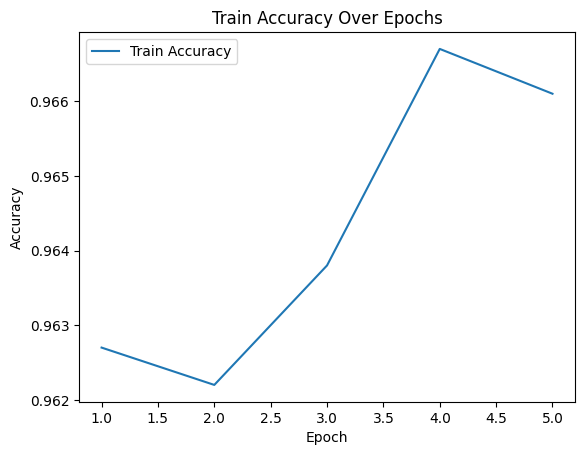

In [54]:
plt.plot(range(1, 6), acc_all[0:5], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy Over Epochs')
plt.legend()
plt.show()